In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [2]:
dataset=pd.read_csv('Social_Network_Ads.csv')
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset['Gender']=le.fit_transform(dataset['Gender'])
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [5]:
X=dataset[['Gender','Age','EstimatedSalary']]
Y=dataset['Purchased']

In [7]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [6]:
X_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=32)

In [7]:
ss=StandardScaler()

X_train=ss.fit_transform(X_train)
x_test=ss.transform(x_test)

In [8]:
def sig(y):
    return (1/(1+np.exp(-y)))

In [9]:
sig(200)

1.0

In [10]:
xvalue=np.linspace(-100,100,1000)

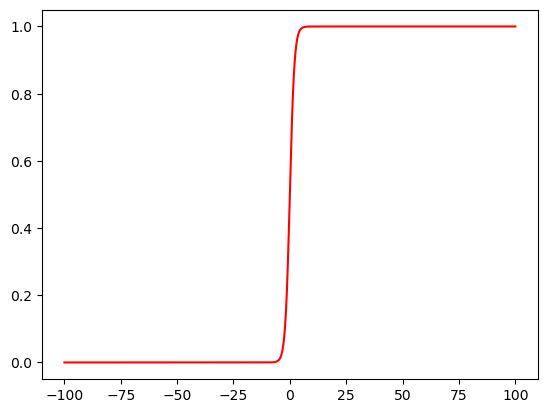

In [11]:
plt.plot(xvalue,sig(xvalue),color='red')
plt.show()

In [12]:
log_reg=LogisticRegression(random_state=0)
log_reg.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [14]:
y_pred=log_reg.predict(x_test)

In [15]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0], dtype=int64)

In [16]:
difference=pd.DataFrame(y_test-y_pred)
difference.value_counts()

Purchased
 0           69
-1            6
 1            5
dtype: int64

In [19]:
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y_test,y_pred)
conf_matrix

array([[43,  6],
       [ 5, 26]], dtype=int64)

In [22]:
!pip install --upgrade scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/a8/e9/3e4879974a7c4dcaca2a746dde3df08d0ae8f14c74b03591616ce5f0a8b1/scikit_learn-1.4.0-1-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB 1.3 MB/s eta 0:00:09
   ---------------------------------------- 0.1/10.6 MB 1.3 MB/s eta 0:00:09
   - -------------------------------------- 0.3/10.6 MB 2.0 MB/s eta 0:00:06
   -- ------------------------------------- 0.6/10.6 MB 3.2 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/10.6 MB 4.4 MB/s eta 0:00:03
   ------ --------------------------------- 1.8/10.6 MB 6.7 MB/s eta 0:00:02
   ------- -------------------------------- 2.0/10.6 MB 7.4 MB/s eta 0:00:02
   ------- -------------------------------- 2.0/10.6 MB 7.4 MB/s eta 0:00:02
   -------- ------------------------------- 2.2/10.6 MB 5.3 MB/s eta 0:00:02
   --------- ----

In [23]:
from sklearn.metrics import plot_confusion_matrix

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\__init__.py)

In [ ]:
plot_confusion_matrix(log_reg,x_test,y_test)
plt.show()

In [4]:
metrics.accuracy_score(y_test,y_pred)

NameError: name 'y_test' is not defined

In [32]:
metrics.precision_score(y_test,y_pred)

0.8125

In [33]:
metrics.recall_score(y_test,y_pred)

0.8387096774193549

In [34]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89        49
           1       0.81      0.84      0.83        31

    accuracy                           0.86        80
   macro avg       0.85      0.86      0.86        80
weighted avg       0.86      0.86      0.86        80



In [36]:
y_pred_prob=log_reg.predict_proba(x_test)
print(y_pred_prob)

[[0.0055796  0.9944204 ]
 [0.97655024 0.02344976]
 [0.94470428 0.05529572]
 [0.07103048 0.92896952]
 [0.04134865 0.95865135]
 [0.70586533 0.29413467]
 [0.97048065 0.02951935]
 [0.08584737 0.91415263]
 [0.12911549 0.87088451]
 [0.95448418 0.04551582]
 [0.7107627  0.2892373 ]
 [0.99054653 0.00945347]
 [0.09201589 0.90798411]
 [0.99331405 0.00668595]
 [0.99470895 0.00529105]
 [0.65523244 0.34476756]
 [0.98249453 0.01750547]
 [0.24554046 0.75445954]
 [0.99606871 0.00393129]
 [0.01970177 0.98029823]
 [0.39810048 0.60189952]
 [0.97627299 0.02372701]
 [0.02938308 0.97061692]
 [0.1127885  0.8872115 ]
 [0.61156588 0.38843412]
 [0.39536429 0.60463571]
 [0.9633422  0.0366578 ]
 [0.9232041  0.0767959 ]
 [0.09808817 0.90191183]
 [0.55775714 0.44224286]
 [0.06670577 0.93329423]
 [0.18521193 0.81478807]
 [0.98935051 0.01064949]
 [0.07089018 0.92910982]
 [0.6409568  0.3590432 ]
 [0.5352707  0.4647293 ]
 [0.99240533 0.00759467]
 [0.03993876 0.96006124]
 [0.91828249 0.08171751]
 [0.96063623 0.03936377]


In [39]:
y_pred_prob=log_reg.predict_proba(x_test)[::,1]
auc=metrics.roc_auc_score(y_test,y_pred_prob)
auc

0.9394338380513495

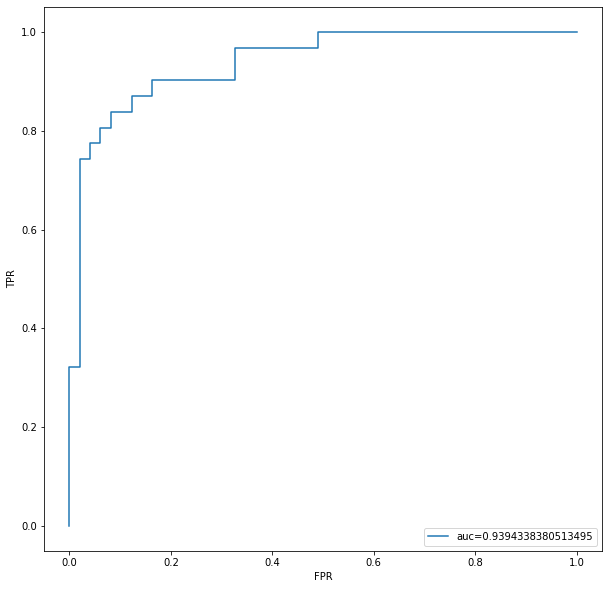

In [45]:
y_pred_prob=log_reg.predict_proba(x_test)[::,1]


fpr,tpr,thresholds=metrics.roc_curve(y_test,y_pred_prob)
auc=metrics.roc_auc_score(y_test,y_pred_prob)

plt.figure(figsize=(10,10))
plt.plot(fpr,tpr,label='auc='+str(auc))
plt.legend(loc=4)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()